## Gasoline Mileage Performance for 32 Automobiles
### Multiple linear regression

In [ ]:
from google.colab import files # comment this if not working on google colab
uploaded = files.upload() # comment this if not working on google colab

Saving gasoline.csv to gasoline.csv


In [ ]:
# importing libraries
import numpy as np
from scipy import optimize, stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
#from google.colab import files # comment this if not working on google colab
#uploaded = files.upload() # comment this if not working on google colab
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Understanding [Gasoline](https://www.oreilly.com/library/view/introduction-to-linear/9780470542811/22_app-b.html) data:

- y: Miles/gallon
- x1: Displacement (cubic in)
- x2: Horsepower (ft-lb)
- x3: Torque (ft-lb)
- x4: Compression ratio
- x5: Rear axle ratio
- x6: Carburetor (barrels)
- x7: No. of transmission speeds
- x8: Overall length (in.)
- x9: Width (in.)
- x10: Weight (lb)
- x11: Type of transmission (A = automatic, M = manual)


In [ ]:
# Read data on google colab
#df = pd.read_excel(uploaded['gasoline.xls'])
#df = pd.read_excel('gasoline.xls')
df = pd.read_csv('gasoline.csv')

# Read data on desktop/laptop
#df = pd.read_excel('gasoline.xls')

df.head()

,Automobile,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,Apollo,18.90,350.0,165,260.0,8.00,2.56,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.50,2.56,4,3,199.6,72.9,3860,A
2,Nova,20.00,250.0,105,185.0,8.25,2.73,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.00,3.00,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.40,2.76,1,3,194.1,71.8,3365,M


In [ ]:
# checking for any missing or nan value
df.isnull().sum().sum()
df[df['x3'].isnull()]

,Automobile,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
22,Trans AM,16.59,400.0,185,NaN,7.6,3.08,4,3,196.0,73.0,3850,A
24,Astre,29.40,140.0,86,NaN,8.0,2.92,2,4,176.4,65.4,2150,M


In [ ]:
# We can delete the entire rows
df.dropna(axis=0, inplace=True) # replace all rows with any NaN

# Or, Filling nan value with x3's median value
# x3_median = df['x3'].median
# df['x3'] = df['x3'].fillna(x3_median)

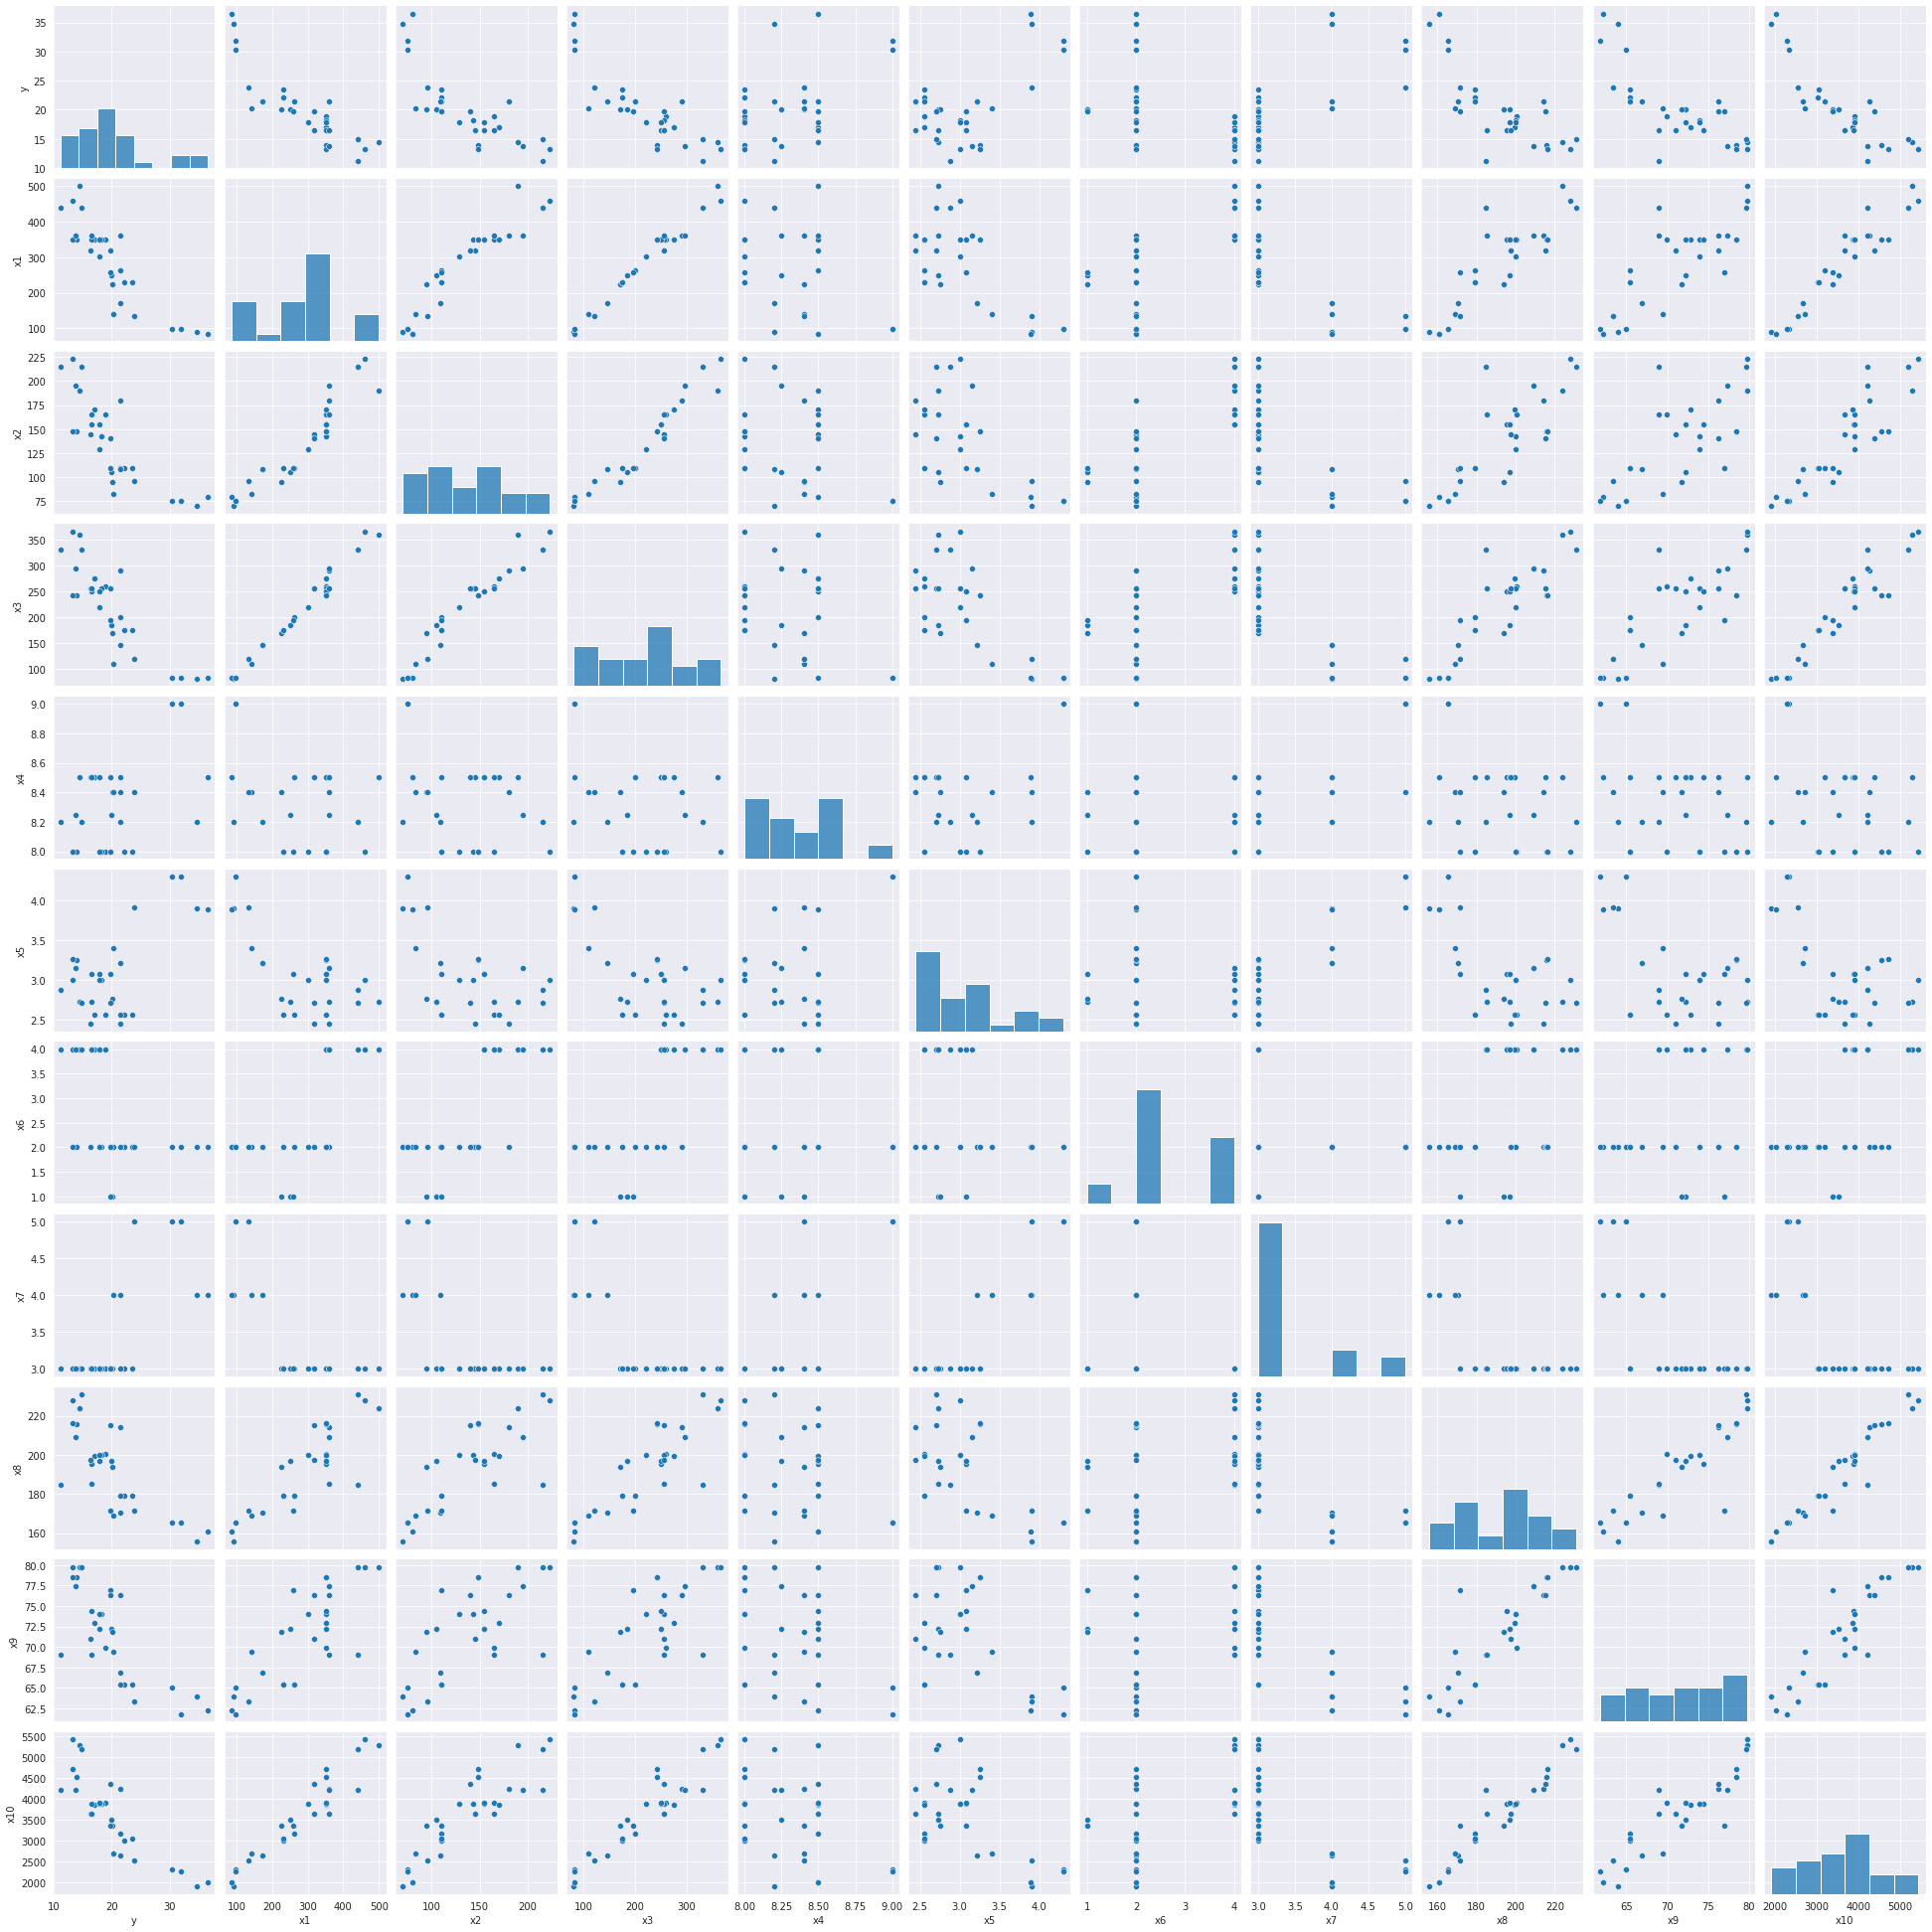

In [ ]:
# visualization
sns.pairplot(df)

In [ ]:
# Creating feature and target (dataframe) matrix
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']]
# X = df[['x1','x4','x5','x6','x7','x8','x9','x10','x11']]

X = sm.add_constant(X) # adding a colm of ones
Y = df[['y']]
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1.0,350.0,165,260.0,8.00,2.56,4,3,200.3,69.9,3910,A
1,1.0,350.0,170,275.0,8.50,2.56,4,3,199.6,72.9,3860,A
2,1.0,250.0,105,185.0,8.25,2.73,1,3,196.7,72.2,3510,A
3,1.0,351.0,143,255.0,8.00,3.00,2,3,199.9,74.0,3890,A
4,1.0,225.0,95,170.0,8.40,2.76,1,3,194.1,71.8,3365,M


In [ ]:
# Handling categorical variables: creating dummy (indicator) variable for categorical variable x11
ft_dummy = pd.get_dummies(X['x11'], prefix='x11', drop_first=True)
X.drop(columns='x11', inplace=True)
Xbig = pd.concat([X, ft_dummy], axis=1)
Xbig.head()

,const,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11_M
0,1.0,350.0,165,260.0,8.00,2.56,4,3,200.3,69.9,3910,0
1,1.0,350.0,170,275.0,8.50,2.56,4,3,199.6,72.9,3860,0
2,1.0,250.0,105,185.0,8.25,2.73,1,3,196.7,72.2,3510,0
3,1.0,351.0,143,255.0,8.00,3.00,2,3,199.9,74.0,3890,0
4,1.0,225.0,95,170.0,8.40,2.76,1,3,194.1,71.8,3365,1


In [ ]:
# Fitting parameters using ordinary least square OLS 
mod_mult = sm.OLS(Y, Xbig)
mod_mult_fit = mod_mult.fit()

print(mod_mult_fit.summary())

Condition number of cov mat = 191199.51594252654

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     8.310
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           5.23e-05
Time:                        14:53:17   Log-Likelihood:                -70.049
No. Observations:                  30   AIC:                             164.1
Df Residuals:                      18   BIC:                             180.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


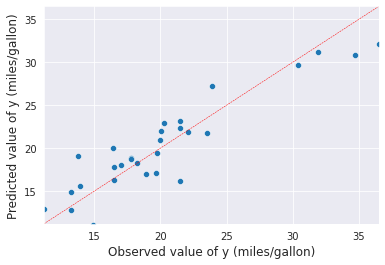

In [ ]:
Y_max = Y.max()[0]
Y_min = Y.min()[0]
ax = sns.scatterplot(np.asanyarray(Y).flatten('F'), mod_mult_fit.predict())
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.ylabel('Predicted value of y (miles/gallon)', fontsize=12)
plt.xlabel('Observed value of y (miles/gallon)', fontsize=12)
plt.plot(X_ref, Y_ref, linestyle = "--", linewidth = 0.5, color = "r")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

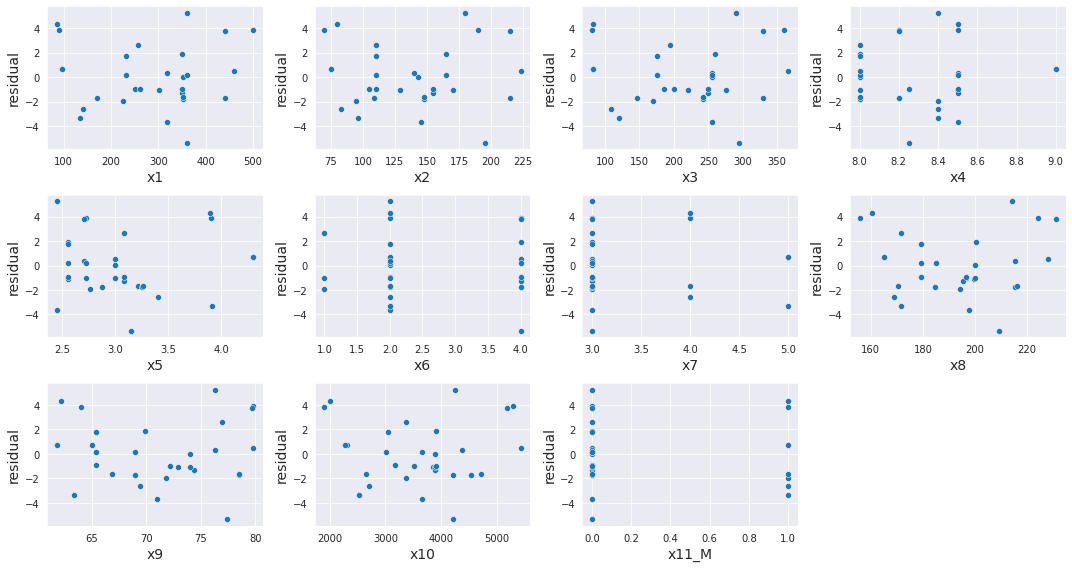

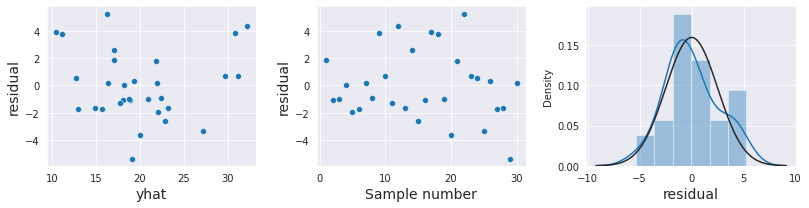

In [ ]:
# Plotting residual

plt.figure(figsize=(15,8))
for i in range(1,Xbig.shape[1]):
    plt.subplot(3,4,i)
    sns.scatterplot(Xbig.iloc[:,i], mod_mult_fit.resid)
    plt.xlabel(Xbig.columns.values[i], fontsize=14)
    plt.ylabel('residual', fontsize=14)
plt.tight_layout()

plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
sns.scatterplot(mod_mult_fit.predict(), mod_mult_fit.resid)
plt.xlabel('yhat', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(1,4,2)
sns.scatterplot(np.arange(1, df.shape[0]+1), mod_mult_fit.resid)
plt.xlabel('Sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(1,4,3)
sns.distplot(mod_mult_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)
plt.tight_layout()

,const,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11_M
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,NaN,1.00,0.94,0.99,-0.35,-0.67,0.64,-0.77,0.86,0.80,0.95,-0.82
x2,NaN,0.94,1.00,0.96,-0.29,-0.55,0.76,-0.63,0.80,0.71,0.89,-0.71
x3,NaN,0.99,0.96,1.00,-0.33,-0.67,0.65,-0.75,0.86,0.79,0.94,-0.80
x4,NaN,-0.35,-0.29,-0.33,1.00,0.41,0.04,0.56,-0.30,-0.38,-0.36,0.44
x5,NaN,-0.67,-0.55,-0.67,0.41,1.00,-0.22,0.87,-0.56,-0.45,-0.58,0.75
x6,NaN,0.64,0.76,0.65,0.04,-0.22,1.00,-0.28,0.42,0.30,0.52,-0.40
x7,NaN,-0.77,-0.63,-0.75,0.56,0.87,-0.28,1.00,-0.66,-0.66,-0.71,0.85
x8,NaN,0.86,0.80,0.86,-0.30,-0.56,0.42,-0.66,1.00,0.88,0.96,-0.68
x9,NaN,0.80,0.71,0.79,-0.38,-0.45,0.30,-0.66,0.88,1.00,0.90,-0.63


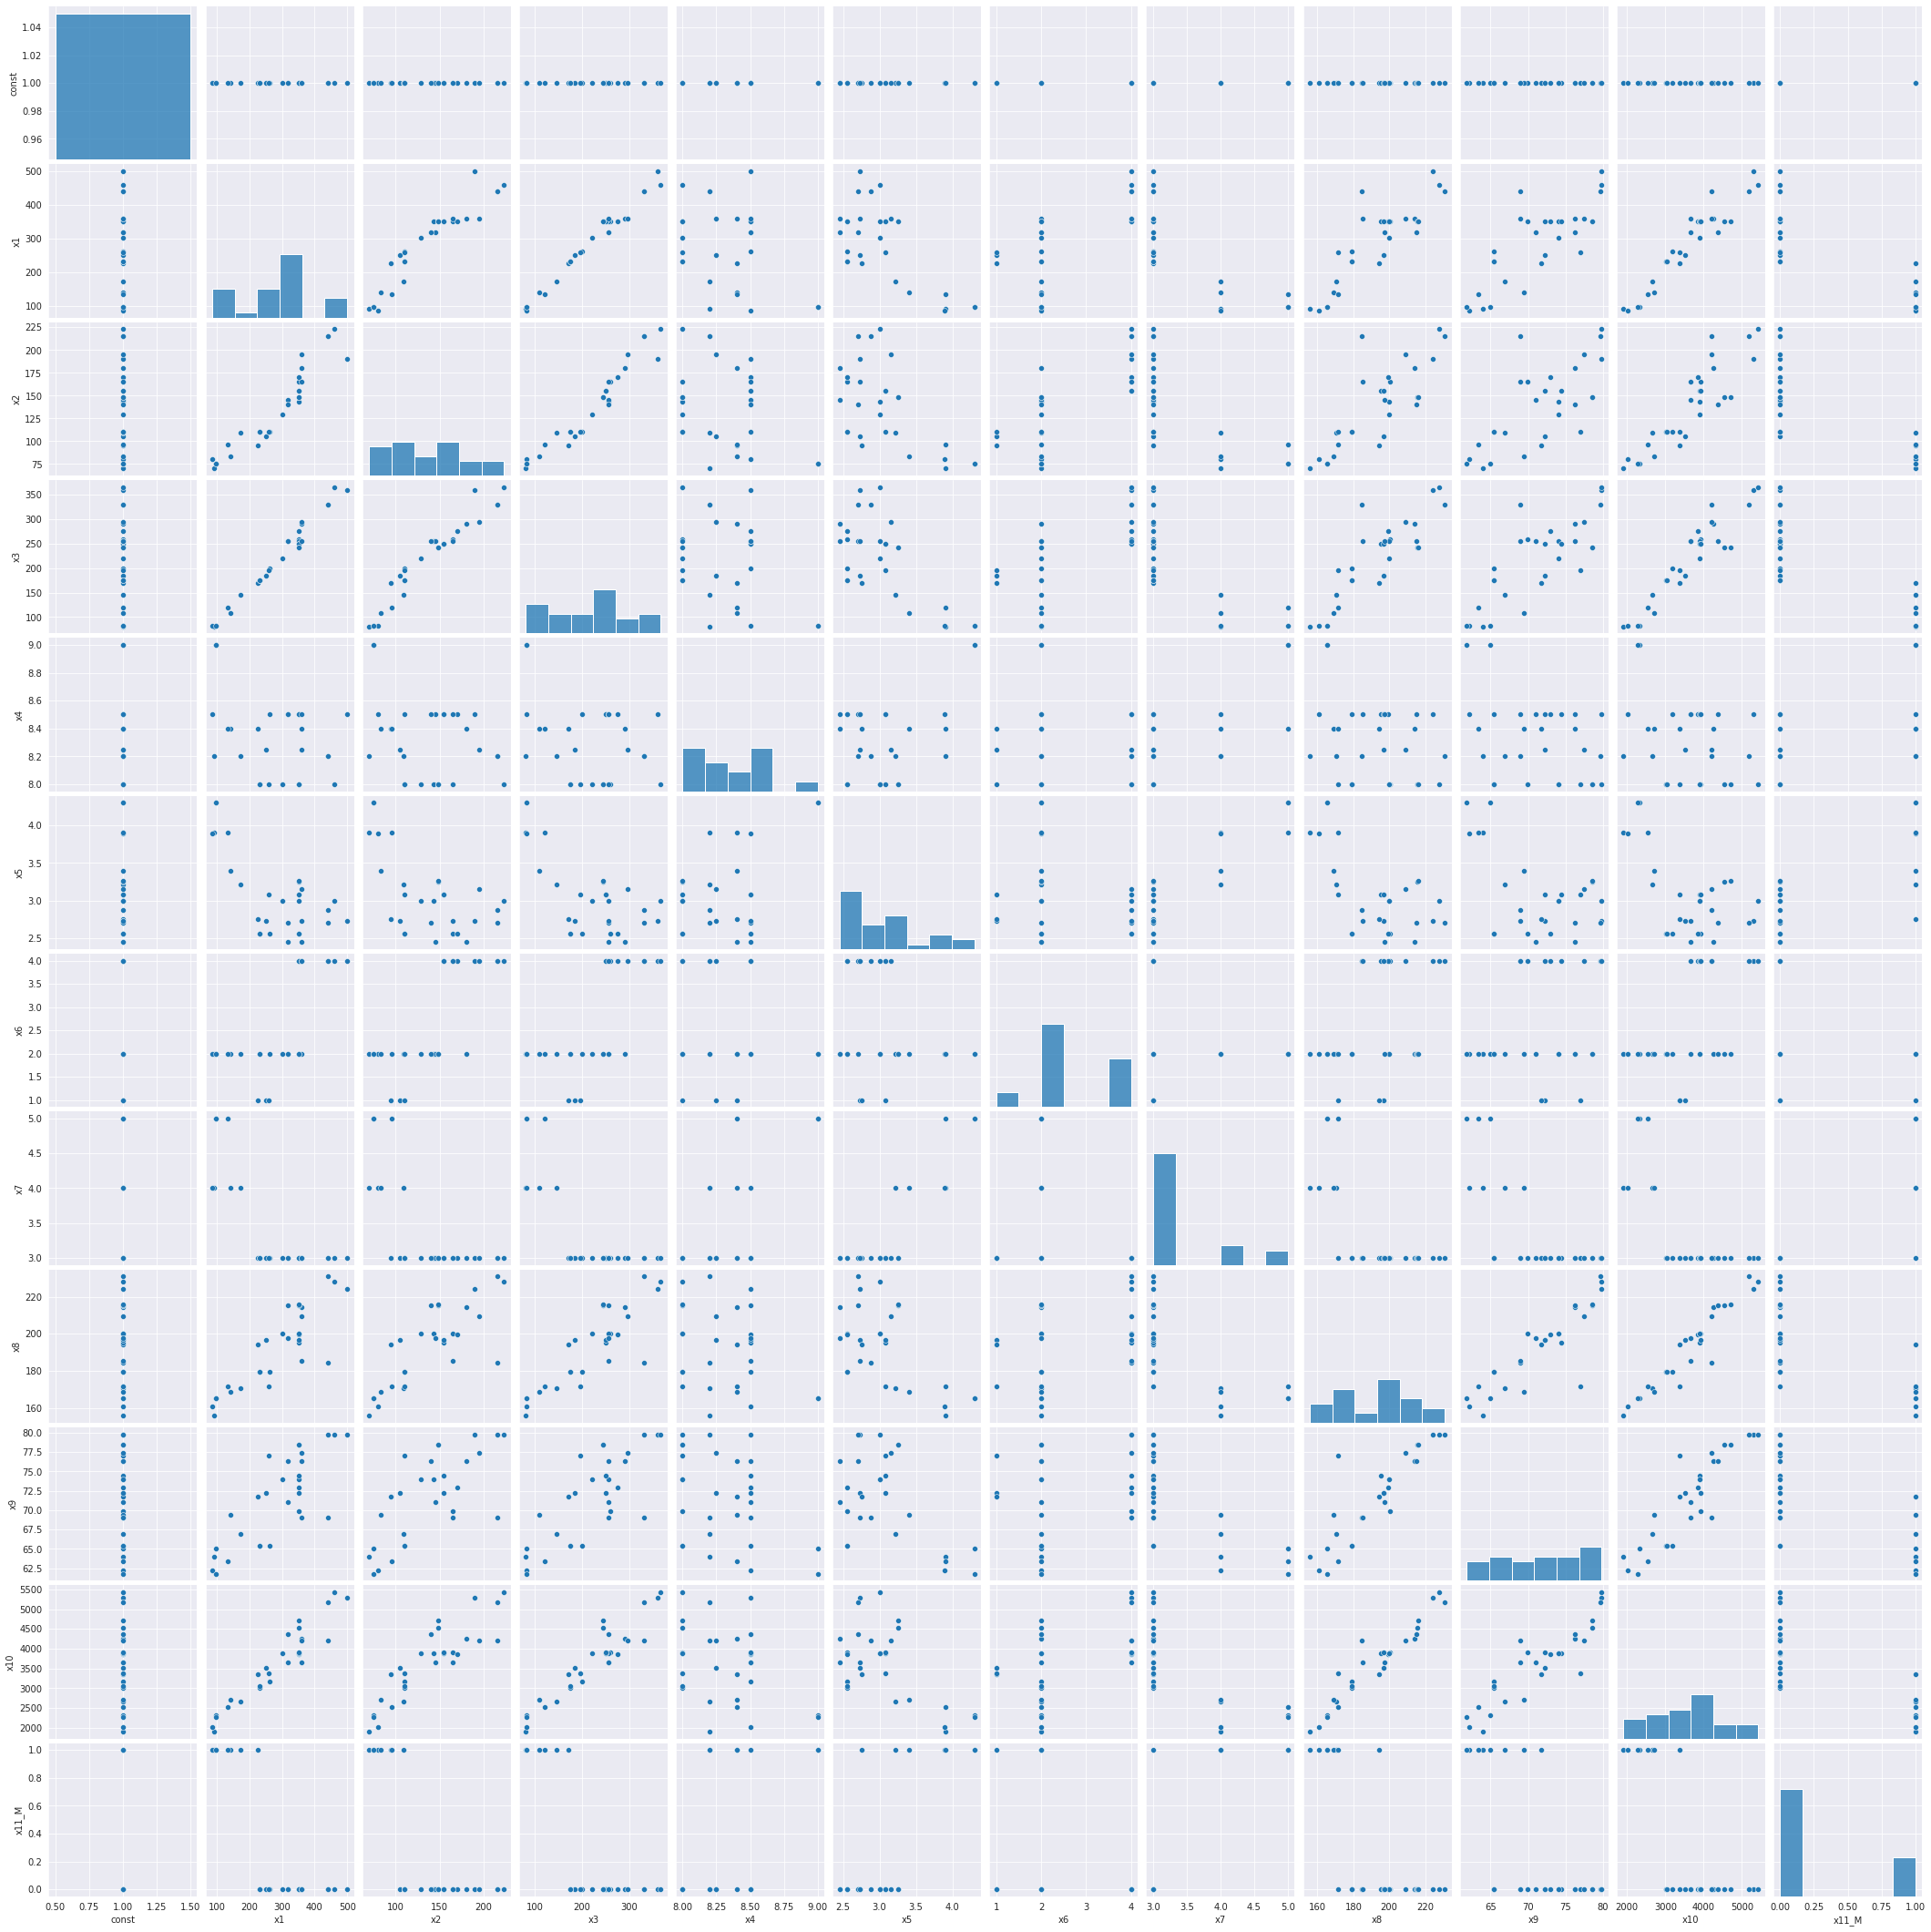

In [ ]:
# p value is insignificant for many variables
# Can visualize pairplot
sns.pairplot(Xbig)

# x2 and x3 seems to be very colinear in pairplot. we can remove them
# df.drop(columns=['x2', 'x3'], inplace=True)

round(Xbig.corr(),2)

In [ ]:
# First level drop : Dropping variable with highest p value and based on obs
X1 = Xbig.drop(columns=['x2','x3','x9','x8','x10'])

# Fitting parameters using ordinary least square OLS 
mod_mult1 = sm.OLS(Y, X1)
mod_mult1_fit = mod_mult1.fit()
mod_mult1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     14.29
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           9.54e-07
Time:                        14:54:32   Log-Likelihood:                -73.818
No. Observations:                  30   AIC:                             161.6
Df Residuals:                      23   BIC:                             171.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3801     21.900      0.383      0.705     -36.924      53.684
x1            -0.0540      0.013     -4.294      0.000      -0.080      -0.028
x4             3.0702      2.745      1.119      0.275      -2.608       8.748
x5             1.3451      2.373      0.567      0.576      -3.563       6.253
x6             0.6957      0.839      0.829      0.416      -1.041       2.432
x7            -1.1914      2.637     -0.452      0.656      -6.646       4.263
x11_M         -1.3323      2.949     -0.452      0.656      -7.433       4.768
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.856
Skew:                           0.410   Prob(JB):                        0.652
Kurtosis:                       2.884   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
#### Thanks

*Tutorial created by IIT Bombay as part of Upgrad course on Business Analytics*
- Om Prakash
- Updated: 6 March 2022
---